In [27]:
from hazma.unitarization.lo_amplitudes import (partial_wave_pipi_to_pipi_LO_I,
                                               amp_pipi_to_pipi_LO)
from hazma.unitarization.nlo_amplitudes import (partial_wave_pipi_to_pipi_NLO_I,
                                                amp_pipi_to_pipi_NLO)
from hazma.unitarization.bethe_salpeter import (phase_shift,
                                                amp_pipi_to_pipi_bse,
                                                fix_phases)

from hazma.parameters import pion_mass_chiral_limit as mPI
from hazma.parameters import charged_pion_mass as mpi

from utilities import latex_text_width_1col

import numpy as np

Load phase shift data

In [56]:
data_dir = "/Users/acoogan/Dropbox/Physics/Physics notes/Unitarized chiPT/data/pipi_phase_shifts/"

exp_phase_shifts = []

for i in range(1, 9):
    raw_data = np.loadtxt("%sI=0_L=0_%i.csv" % (data_dir, i), delimiter=",").T
    exp_phase_shifts.append({"e_cms": raw_data[0],
                             "phase_shifts": raw_data[1]})
    
# Marker shapes
markers = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H']

In [ ]:
e_cms = np.linspace(2*mpi, 1200, 500)

nlo_phase_shifts = 180/np.pi*phase_shift(e_cms,
                                         partial_wave_pipi_to_pipi_NLO_I(e_cms**2, 0))
bse_phase_shifts = fix_phases(180/np.pi*phase_shift(e_cms,
                                                    amp_pipi_to_pipi_bse(e_cms)))

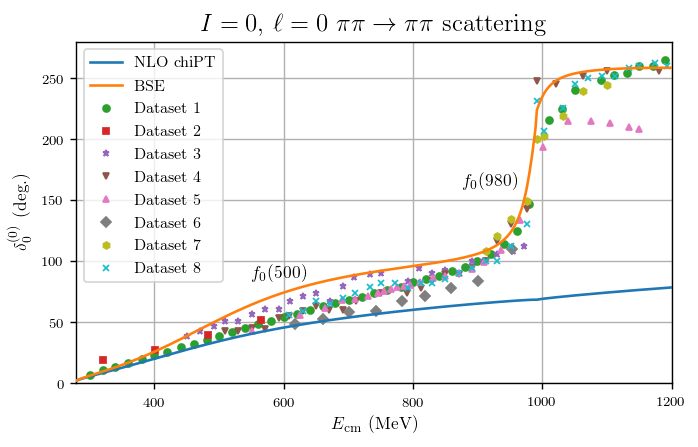

In [76]:
plt.figure(figsize=(latex_text_width_1col, 0.65*latex_text_width_1col))

# Theory
plt.plot(e_cms, nlo_phase_shifts, label="NLO chiPT", zorder=10)
plt.plot(e_cms, bse_phase_shifts, label="BSE", zorder=11)

# Data
for (i, (pss, m)) in enumerate(zip(exp_phase_shifts, markers)):
    plt.plot(pss["e_cms"], pss["phase_shifts"],
             m, label="Dataset %i" % (i+1), markersize=4)
###
plt.grid()
plt.legend()
plt.xlim(e_cms[[0, -1]])
plt.ylim(0, 280)
plt.title(r"$I=0$, $\ell=0$ $\pi\pi\to\pi\pi$ scattering")
plt.xlabel(r"$E_{\mathrm{cm}}$ (MeV)")
plt.ylabel(r"$\delta_{0}^{(0)}$ (deg.)")

plt.text(550, 85, r"$f_0(500)$", fontsize=10)
plt.text(875, 160, r"$f_0(980)$", fontsize=10)

plt.tight_layout()
plt.savefig("/Users/acoogan/Dropbox/Physics/Thesis/figures/hazma_figures/phase_shifts.pdf")